In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
import numpy as np
X,y = load_wine(return_X_y = True)

k_model_default = KNeighborsClassifier(n_neighbors = 1)
k_model_mahal = KNeighborsClassifier(n_neighbors = 1,
metric = 'mahalanobis',
metric_params={'V':np.cov(X.T)})

default_score = cross_val_score(k_model_default,X,y).mean()
mahal_score = cross_val_score(k_model_mahal,X,y).mean()

print('default: ', round(1-default_score,2), '\nMahalanobis: ',round(1- mahal_score,2))



default:  0.27 
Mahalanobis:  0.13


In [74]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(X.T))

print('eigen values: \n',eig_vals, '\n\neigenvectors: \n',eig_vecs)

eigen values: 
 [9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 8.20370314e-03 2.10723661e-02 3.75759789e-02
 7.17026032e-02] 

eigenvectors: 
 [[-1.65926472e-03 -1.20340617e-03  1.68738094e-02  1.41446778e-01
  -2.03369773e-02  1.94120104e-01 -9.23280337e-01  2.84820658e-01
   8.66006124e-02  8.02924535e-03  1.56514071e-02 -1.49715080e-02
  -2.24499994e-03]
 [ 6.81015556e-04 -2.15498184e-03  1.22003373e-01  1.60389543e-01
   6.12883454e-01  7.42472963e-01  1.50109941e-01 -6.46744678e-02
   1.56621385e-02 -1.10903923e-02 -6.72955455e-02 -2.31876506e-02
  -1.85093501e-02]
 [-1.94905742e-04 -4.59369254e-03  5.19874304e-02 -9.77280992e-03
  -2.01755752e-02  4.17529118e-02 -4.50095493e-02 -1.49339532e-01
   7.36498524e-02 -1.73685673e-01  1.32063034e-01  9.54010643e-01
  -8.67996529e-02]
 [ 4.67130058e-03 -2.64503930e-02  9.38593003e-01 -3.30965260e-01
  -6.43523403e-02 -2.40653026e-02 -3.15265835e-02

In [3]:
from sklearn.neighbors import VALID_METRICS
print( sorted(VALID_METRICS['brute']))

['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'haversine', 'jaccard', 'kulsinski', 'l1', 'l2', 'mahalanobis', 'manhattan', 'matching', 'minkowski', 'nan_euclidean', 'precomputed', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml

X,y = fetch_openml('credit-approval',version = 1,return_X_y = True, as_frame = False)
pipe = Pipeline([('impute',SimpleImputer()),('scaler',StandardScaler()),('sgdclassifier',SGDClassifier())])

score = cross_val_score(pipe,X,y,cv=10).mean()
print('mean: ',score)

mean:  0.8


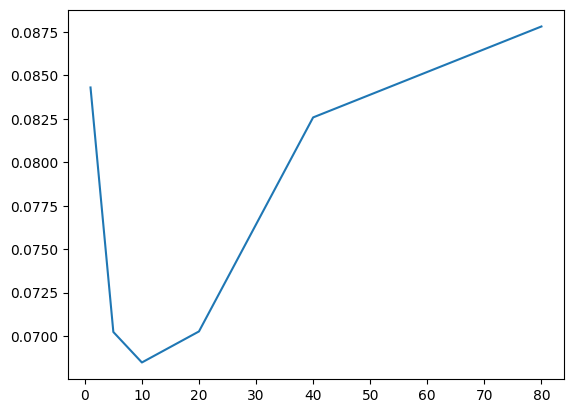

In [70]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

X,y = load_breast_cancer(as_frame = False,return_X_y = True)
scores = []
ks = [1,5,10,20,40,80]
for k in ks:
    model = KNeighborsClassifier(n_neighbors= k)
    scores.append(1 - cross_val_score(model,X,y,cv = 10).mean())

plt.plot(ks,scores)
